In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X, y = mnist["data"], mnist["target"]

In [10]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [11]:
import matplotlib.pyplot as plt

In [24]:
d1 = X[0]

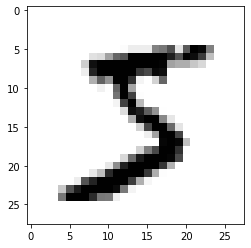

In [14]:
plt.imshow(d1, cmap='binary')

In [15]:
y[0]

'5'

In [16]:
y = y.astype(int)

In [17]:
y[0]

5

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [19]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [20]:
from sklearn.linear_model import SGDClassifier

In [21]:
sgd = SGDClassifier(random_state=101)

In [22]:
sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=101)

In [26]:
sgd.predict([d1])

array([ True])

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)

C:\Users\91836\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [33]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clf_clone = clone(sgd)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[train_index]
    y_test_folds = y_train_5[train_index]
    
    clf_clone.fit(X_train_folds, y_train_folds)
    y_pred = clf_clone.predict(X_train_folds)
    n_correct = sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

0.970675
0.9723
0.9518


In [34]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96945, 0.96725, 0.9511 ])

In [37]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [39]:
never_5_clf = Never5Classifier()

In [40]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [42]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_train_5, y_train_pred))
print(classification_report(y_train_5, y_train_pred))

[[54238   341]
 [ 1903  3518]]
              precision    recall  f1-score   support

       False       0.97      0.99      0.98     54579
        True       0.91      0.65      0.76      5421

    accuracy                           0.96     60000
   macro avg       0.94      0.82      0.87     60000
weighted avg       0.96      0.96      0.96     60000

